In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.core.display import display, HTML


In [2]:
df = pd.read_csv("smart_home_device_usage_data.csv")

In [3]:
df.head()

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1


In [4]:
df.shape

(5403, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UserID                5403 non-null   int64  
 1   DeviceType            5403 non-null   object 
 2   UsageHoursPerDay      5403 non-null   float64
 3   EnergyConsumption     5403 non-null   float64
 4   UserPreferences       5403 non-null   int64  
 5   MalfunctionIncidents  5403 non-null   int64  
 6   DeviceAgeMonths       5403 non-null   int64  
 7   SmartHomeEfficiency   5403 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 337.8+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,5403.0,2702.000000,1559.856083,1.000000,1351.500000,2702.000000,4052.500000,5403.000000
UsageHoursPerDay,5403.0,12.052992,6.714961,0.501241,6.297871,11.903768,17.791751,23.987326
EnergyConsumption,5403.0,5.054302,2.878941,0.101562,2.524968,5.007047,7.611912,9.998071
UserPreferences,5403.0,0.511753,0.499908,0.000000,0.000000,1.000000,1.000000,1.000000
MalfunctionIncidents,5403.0,2.066445,1.423291,0.000000,1.000000,2.000000,3.000000,4.000000
DeviceAgeMonths,5403.0,30.312234,16.990525,1.000000,15.000000,30.000000,45.000000,59.000000
SmartHomeEfficiency,5403.0,0.376643,0.484589,0.000000,0.000000,0.000000,1.000000,1.000000


In [7]:
df.drop("UserID", axis=1, inplace=True)


In [8]:
cats = ["DeviceType", "UserPreferences", "SmartHomeEfficiency"]
nums = [i for i in df.columns if i not in cats]

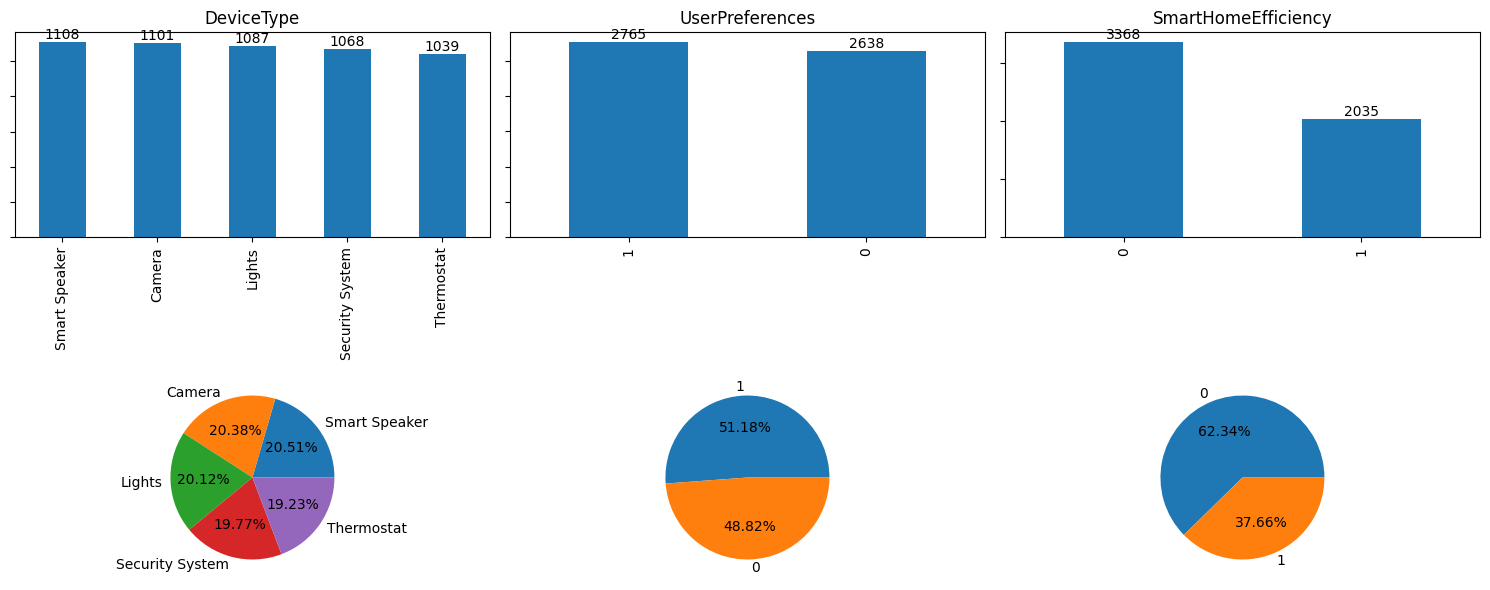

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))

for i, j in enumerate(cats):
    count = df[j].value_counts()
    index = 0
    count.plot(kind="bar", ax=axes[index][i])
    for container in axes[index][i].containers:
        axes[index][i].bar_label(container)
    axes[index][i].set_yticklabels(())
    axes[index][i].set_ylabel("")
    axes[index][i].set_xlabel("")
    axes[index][i].set_title(j)
    
    index += 1
    count.plot(kind="pie", ax=axes[index][i], autopct="%0.2f%%")
    axes[index][i].set_ylabel("")
    axes[index][i].set_xlabel("")
plt.tight_layout()
plt.show()

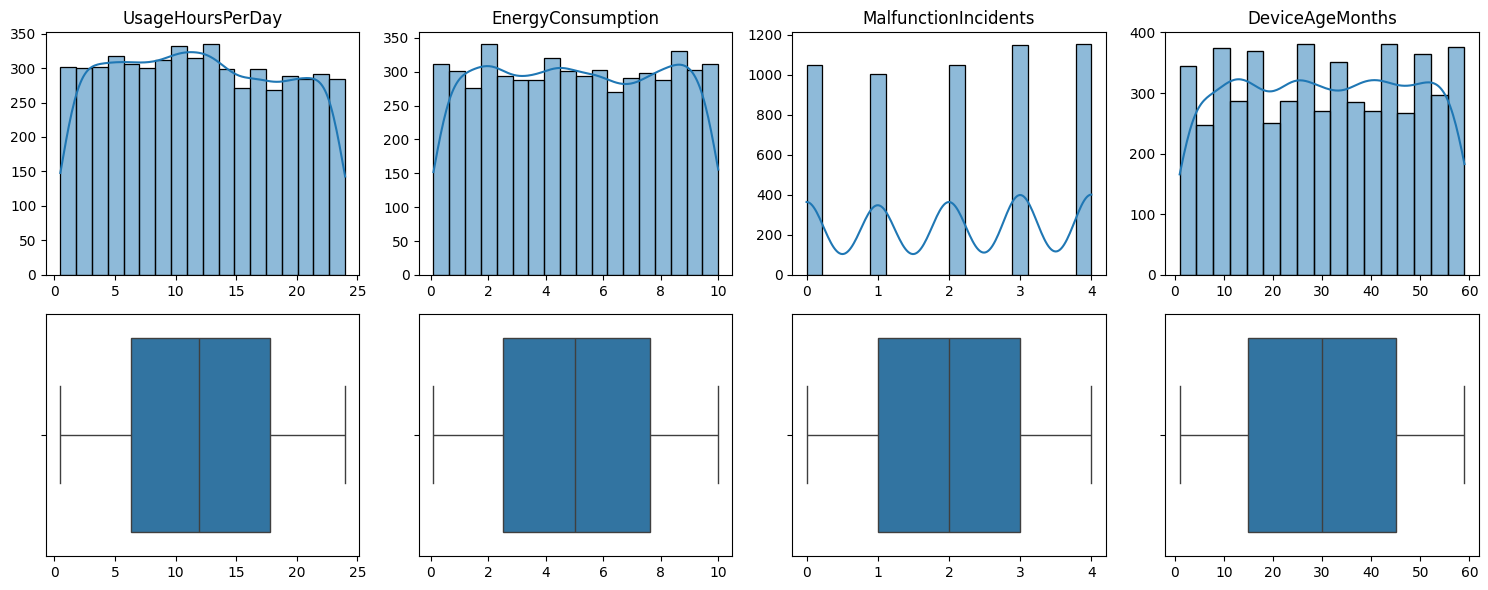

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))

for i, j in enumerate(nums):
    index = 0
    sns.histplot(df, x=j, kde=True, ax=axes[index][i])
    axes[index][i].set_ylabel("")
    axes[index][i].set_xlabel("")
    axes[index][i].set_title(j)
    
    index += 1
    sns.boxplot(df, x=j, ax=axes[index][i])
    axes[index][i].set_ylabel("")
    axes[index][i].set_xlabel("")
plt.tight_layout()
plt.show()

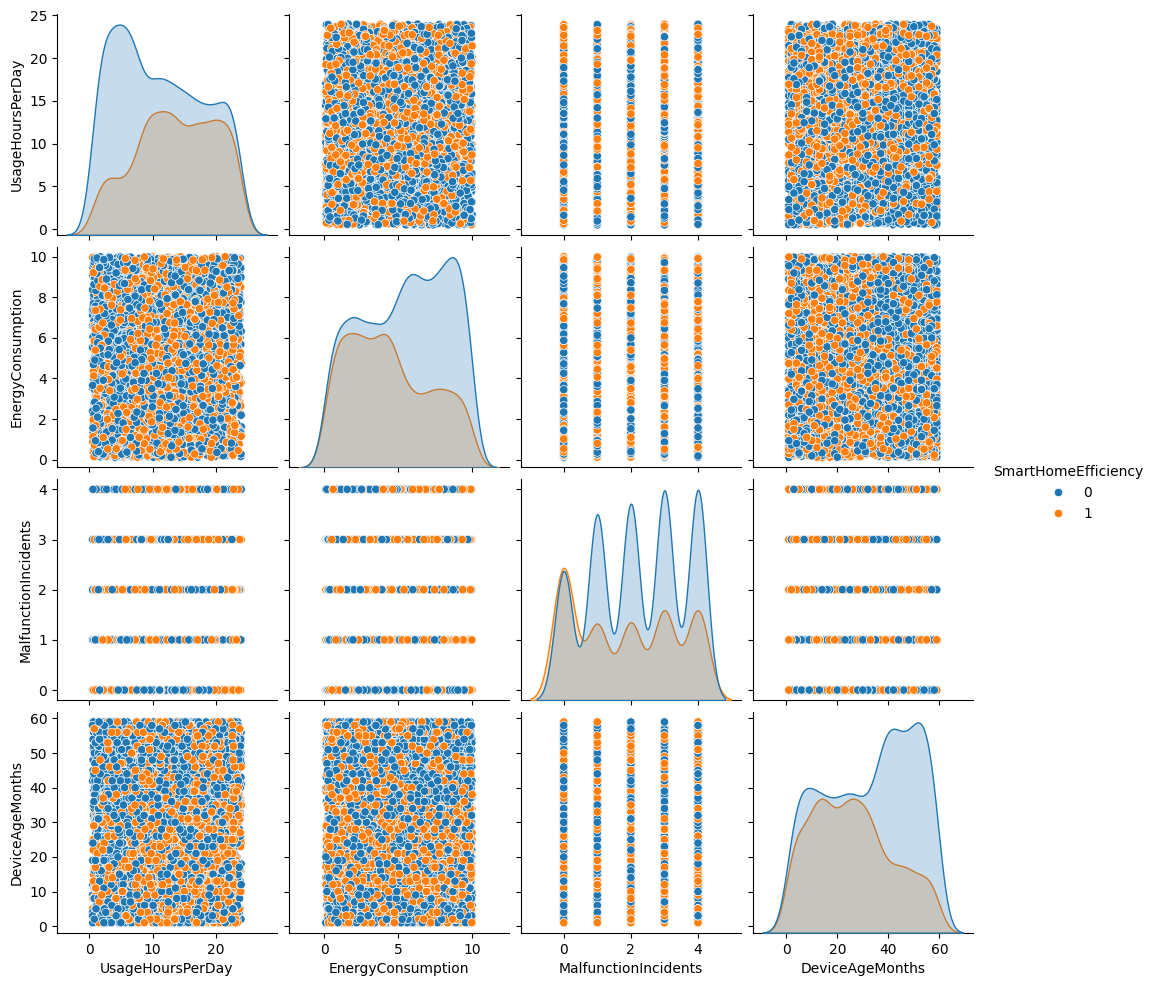

In [11]:
sns.pairplot(df, vars=nums, hue=cats[-1])
plt.show()

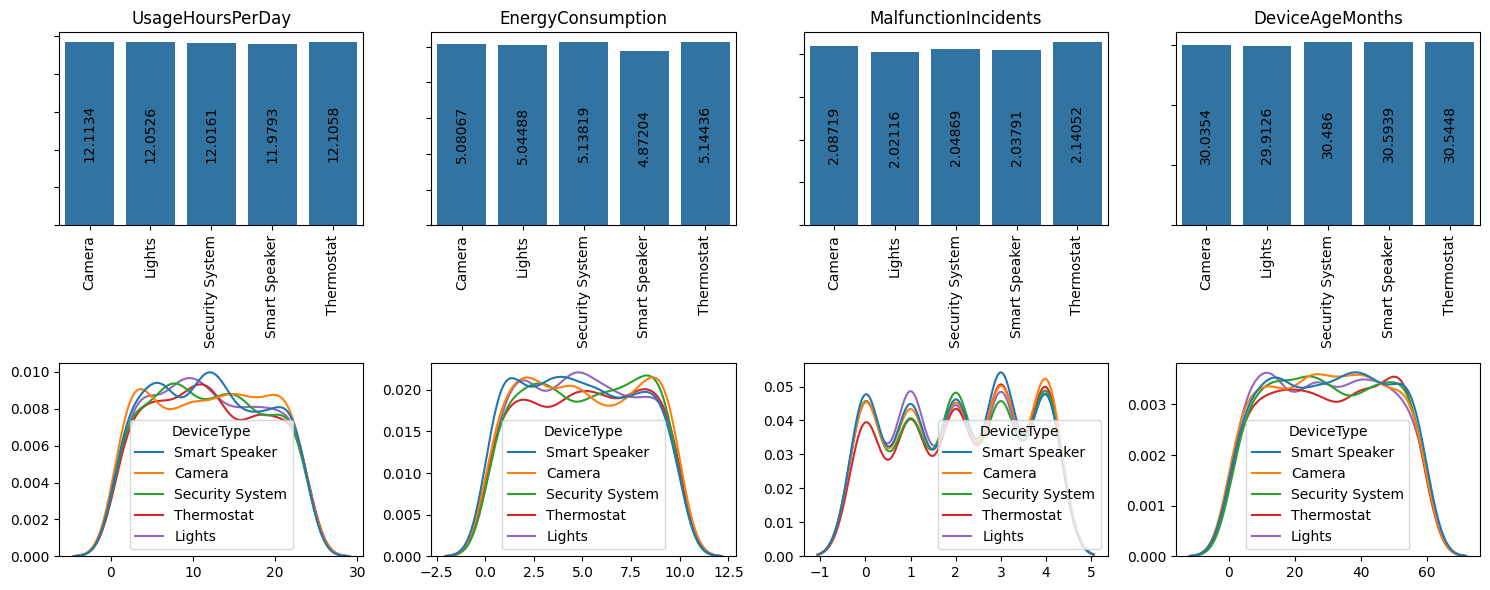

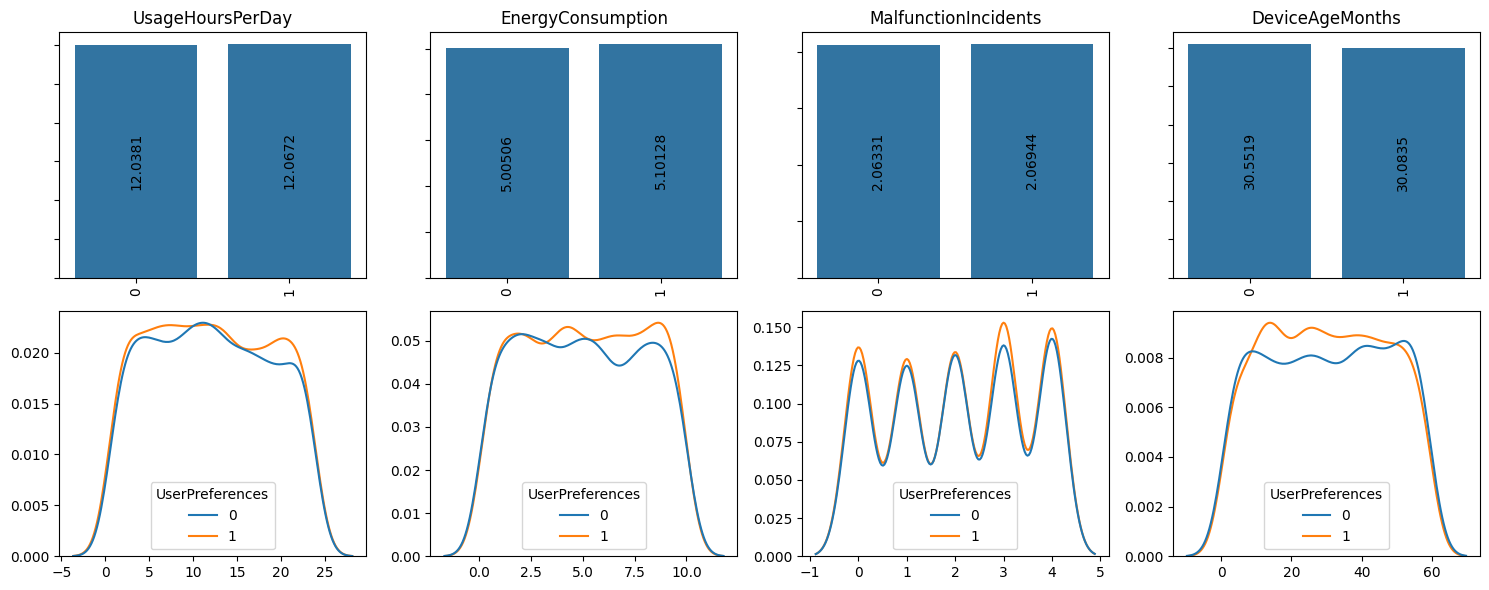

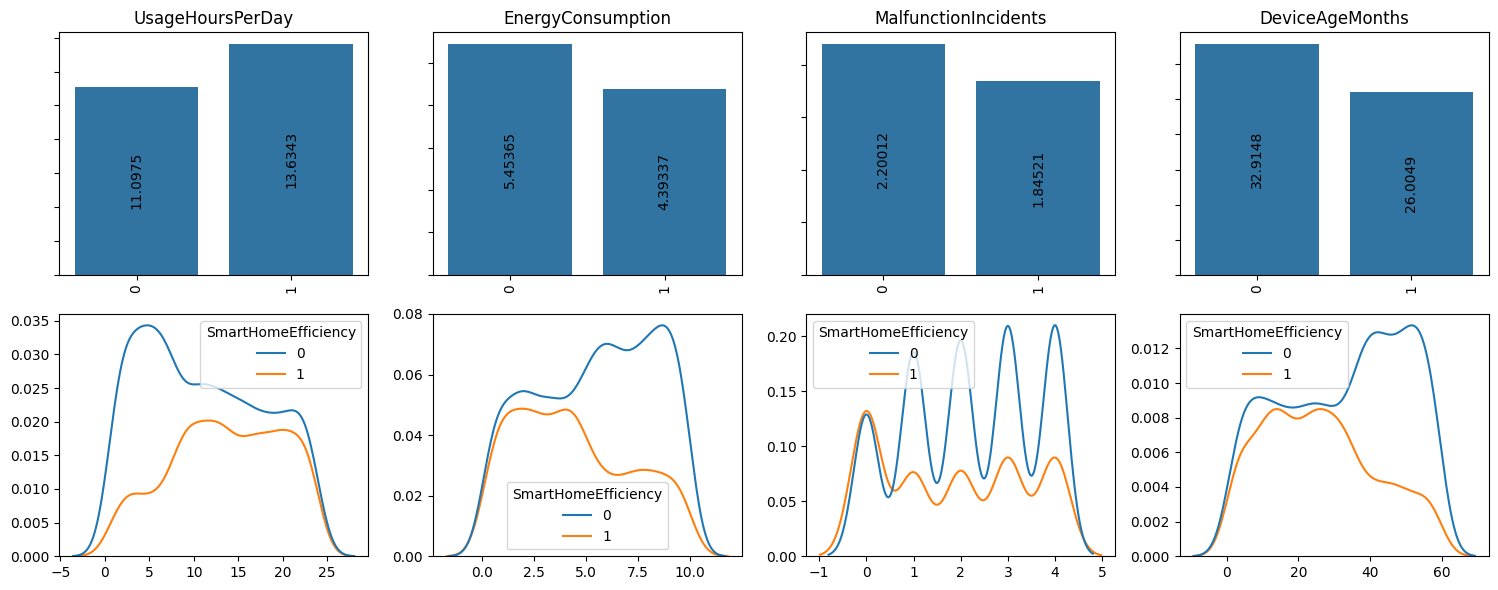

In [12]:
for i in cats:
    display(HTML("<h2>{}</h2>".format(i)))
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))
    grouped = df.groupby(i)
    for k, j in enumerate(nums):
        index = 0
        mean = grouped[j].mean()
        sns.barplot(x=mean.index, y=mean, ax=axes[index][k])
        for container in axes[index][k].containers:
            axes[index][k].bar_label(container, label_type="center", rotation=90)
        axes[index][k].set_xticklabels(axes[index][k].get_xticklabels(), rotation=90)
        axes[index][k].set_yticklabels(())
        axes[index][k].set_ylabel("")
        axes[index][k].set_xlabel("")
        axes[index][k].set_title(j)
        index += 1
        sns.kdeplot(df, x=j, hue=i, ax=axes[index][k])
        axes[index][k].set_ylabel("")
        axes[index][k].set_xlabel("")
    plt.tight_layout()
    plt.show()

In [13]:
le = LabelEncoder()
df["DeviceType"] = le.fit_transform(df["DeviceType"].values)

In [14]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

scaler = MinMaxScaler()

x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

from collections import Counter

print("Before: ", Counter(y_train))

smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

print("After: ", Counter(y_train))

Before:  Counter({0: 2690, 1: 1632})
After:  Counter({0: 2690, 1: 2690})


In [15]:
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()
lgb = LGBMClassifier()
svc = SVC()
lgr = LogisticRegression()

models = [rfc, abc, etc,
         gbc, xgb, lgb, svc, lgr]

names = ["Random Forest", "Ada Boost", "Extra Trees",
        "Gradient Boosting", "XGBoost", "LightGBM",
        "Support Vector Machine", "Logistic Regression"]



In [16]:
def training(model):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    score = accuracy_score(pred, y_test)
    report = classification_report(pred, y_test)
    cm = confusion_matrix(pred, y_test)
    
    return score*100, report, cm

In [17]:
scores, reports, cms = [], dict(), dict()

for i, j in zip(models, names):
    score, report, cm = training(i)
    scores += [score]
    reports[j] = report
    cms[j] = cm

  File "/home/user/workspace/.venv/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 250, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/usr/lib/python3.11/subprocess.py", line 1953, in _execute_child
    raise child_exception_type(errno_num, err_msg, err_filename)


[LightGBM] [Info] Number of positive: 2690, number of negative: 2690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 868
[LightGBM] [Info] Number of data points in the train set: 5380, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


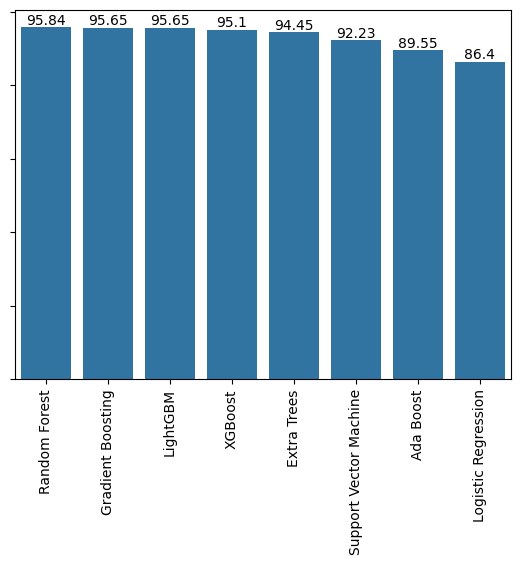

In [18]:
dd = pd.DataFrame({"scores": scores}, index=names)
dd = dd.sort_values("scores", ascending=False)
dd["scores"] = round(dd["scores"], 2)
fig, axes = plt.subplots()
sns.barplot(x=dd.index, y=dd.iloc[:, 0], ax=axes)
for container in axes.containers:
    axes.bar_label(container)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
axes.set_yticklabels(())
axes.set_ylabel("")
axes.set_xlabel("")
plt.show()

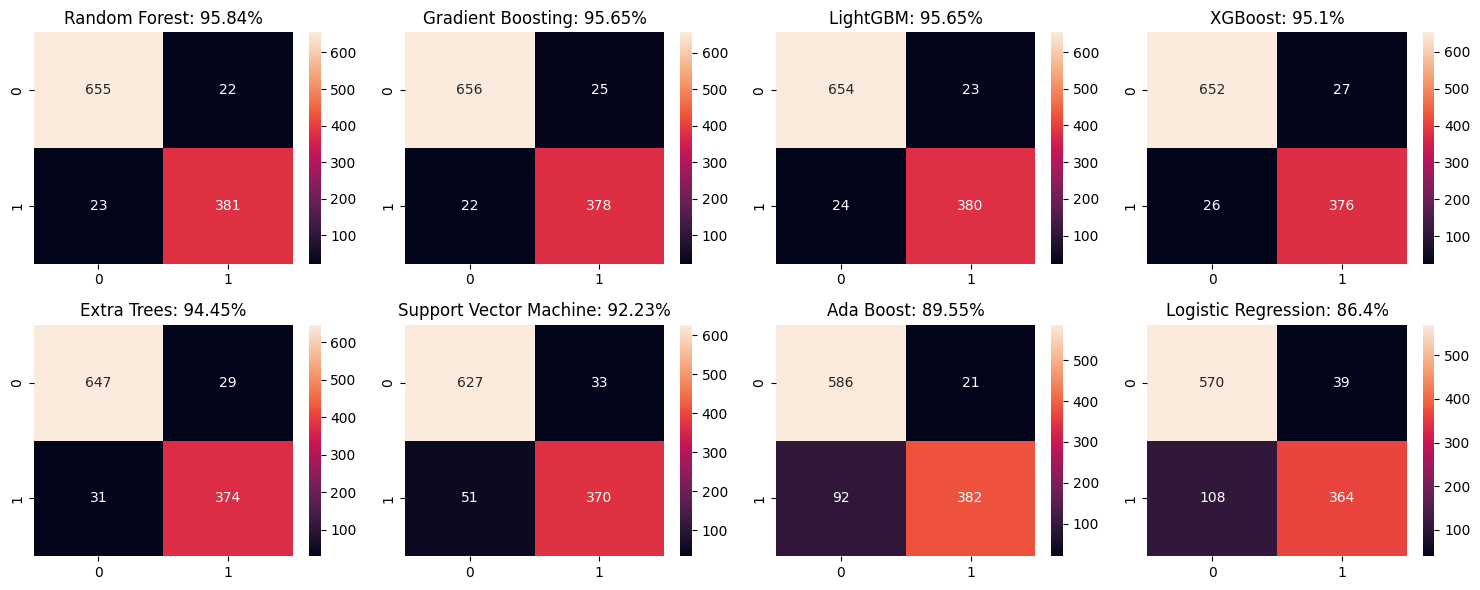

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))
index = 0

for i in range(2):
    for j in range(4):
        sns.heatmap(cms[dd.index[index]], annot=True, ax=axes[i][j], fmt='d')
        axes[i][j].set_title("{}: {}%".format(dd.index[index], dd.iloc[index, 0]))
        index += 1
plt.tight_layout()
plt.show()

In [20]:
for i in dd.index:
    print("*"*30)
    print(i)
    print(reports[i])
    print("\n\n")

******************************
Random Forest
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       677
           1       0.95      0.94      0.94       404

    accuracy                           0.96      1081
   macro avg       0.96      0.96      0.96      1081
weighted avg       0.96      0.96      0.96      1081




******************************
Gradient Boosting
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       681
           1       0.94      0.94      0.94       400

    accuracy                           0.96      1081
   macro avg       0.95      0.95      0.95      1081
weighted avg       0.96      0.96      0.96      1081




******************************
LightGBM
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       677
           1       0.94      0.94      0.94       404

    accuracy                           0.9